# The Alchemy of Advertising: What Turns Ad Dollars Into Gold?

---

**Every day, billions of dollars evaporate into the digital void.** Companies pour money into Google, Meta, and TikTok, hoping their ads will resonate. Some campaigns return 30x their investment. Others burn through budgets faster than a California wildfire. What separates the winners from the losers?

That's the mystery we're solving today.

We have 1,800 advertising campaigns from around the world - spanning fintech to healthcare, from the UAE to Australia. Each row is a story: money spent, people reached, clicks generated, and (most importantly) whether any of it was worth it.

Our mission: **Predict ROAS (Return on Ad Spend)** - the holy grail metric that tells us how many dollars we get back for every dollar we invest. A ROAS of 1 means you broke even. Below 1? You're lighting money on fire. Above 5? You've found advertising nirvana.

Let's follow the money.

---

## 1. Setting the Stage

Before we dive into the data, we need our tools. Think of this as a detective assembling their kit before entering a crime scene.

In [34]:
# Silence the noise - we only want to hear what the data tells us
import warnings
warnings.filterwarnings('ignore')

# The fundamentals - data wrangling
import pandas as pd
import numpy as np

# Visualization - making the invisible visible
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics - the science behind the intuition
from scipy import stats
from scipy.stats import shapiro, chi2_contingency, mannwhitneyu, kruskal, f_oneway

# Machine Learning - where prediction meets reality
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Aesthetic preferences
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Color palette - professional and consistent
COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B', '#95C623']
sns.set_palette(COLORS)

print("Arsenal loaded. Ready to investigate.")

Arsenal loaded. Ready to investigate.


---

## 2. Meeting Our Data

The first rule of data analysis: **never trust what you're told, verify everything yourself.** Let's meet our dataset and see what we're actually working with.

In [35]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("nudratabbas/global-ads-performance-google-meta-tiktok")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'global-ads-performance-google-meta-tiktok' dataset.
Path to dataset files: /kaggle/input/global-ads-performance-google-meta-tiktok


In [36]:
print(os.listdir(path))

['global_ads_performance_dataset.csv']


In [37]:
# Load the evidence
df = pd.read_csv(os.path.join(path,'global_ads_performance_dataset.csv'))

# First impressions matter
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Campaigns analyzed: {df.shape[0]:,}")
print(f"Features captured: {df.shape[1]}")
print(f"Memory footprint: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\nColumn inventory:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

DATASET OVERVIEW
Campaigns analyzed: 1,800
Features captured: 14
Memory footprint: 624.21 KB

Column inventory:
   1. date
   2. platform
   3. campaign_type
   4. industry
   5. country
   6. impressions
   7. clicks
   8. CTR
   9. CPC
  10. ad_spend
  11. conversions
  12. CPA
  13. revenue
  14. ROAS


**What we have:** 14 features tracking the complete lifecycle of an ad campaign - from how many eyeballs saw it (impressions) to whether it actually made money (ROAS).

Let's see the raw data:

In [38]:
# A glimpse at the first few suspects
print("First 5 campaigns in our dataset:")
df.head()

First 5 campaigns in our dataset:


,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39


In [39]:
# The technical fingerprint
print("Data types - this tells us how each column is stored:")
print(df.dtypes)
print("\n" + "="*60)
print("\nNote: 'date' is stored as object (string). We'll fix that shortly.")

Data types - this tells us how each column is stored:
date              object
platform          object
campaign_type     object
industry          object
country           object
impressions        int64
clicks             int64
CTR              float64
CPC              float64
ad_spend         float64
conversions        int64
CPA              float64
revenue          float64
ROAS             float64
dtype: object


Note: 'date' is stored as object (string). We'll fix that shortly.


In [40]:
# Statistical summary - the vital signs
print("Numerical columns - descriptive statistics:")
df.describe().round(2)

Numerical columns - descriptive statistics:


,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
count,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00
mean,102919.02,3962.68,0.04,1.57,6171.53,181.56,46.61,30101.85,6.45
std,55740.90,2941.86,0.02,0.80,5777.00,171.42,41.19,34560.03,6.59
min,5059.00,91.00,0.01,0.28,58.00,2.00,4.80,142.69,0.13
25%,54948.00,1678.00,0.03,0.95,1966.59,59.00,20.20,7275.76,2.17
50%,103653.00,3318.00,0.04,1.46,4393.86,130.00,33.38,18362.96,4.30
75%,150470.25,5628.00,0.05,2.05,8455.83,252.25,56.81,38963.38,8.21
max,199650.00,16660.00,0.10,3.95,38453.32,1151.00,335.86,295028.26,49.00


### First Impressions

Several things jump out immediately:

1. **Huge variance in scale**: Impressions range from ~5,000 to ~200,000. Some campaigns barely reached anyone; others saturated their markets.

2. **ROAS has wild swings**: The average is 7.91, but it ranges from 0.18 (losing 82 cents on every dollar) to 49.55 (making $50 for every $1 spent). That's a 275x difference between worst and best performers.

3. **CTR (Click-Through Rate)**: Mean of 4.3% - that's actually quite healthy. Industry average hovers around 2-3%.

4. **Ad spend varies dramatically**: From $56 to $33,000 per campaign. We're looking at both small tests and major pushes.

The data has spoken. Now let's listen more closely.

---

## 3. Exploratory Data Analysis (EDA)

This is where the detective work begins. We'll examine every corner of this dataset, looking for patterns, anomalies, and clues about what drives advertising success.

### 3.1 The Missing Pieces

Missing data is like missing evidence - it can make or break a case. Let's see what we're working with:

In [41]:
# Checking for missing values
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data.sort_values('Missing Count', ascending=False)

print("Missing Value Analysis:")
print("="*50)
print(missing_data)
print("\n" + "="*50)
total_missing = df.isnull().sum().sum()
print(f"Total missing cells: {total_missing}")
print(f"Dataset completeness: {(1 - total_missing / df.size) * 100:.2f}%")

Missing Value Analysis:
               Missing Count  Missing Percentage
date                       0                 0.0
platform                   0                 0.0
campaign_type              0                 0.0
industry                   0                 0.0
country                    0                 0.0
impressions                0                 0.0
clicks                     0                 0.0
CTR                        0                 0.0
CPC                        0                 0.0
ad_spend                   0                 0.0
conversions                0                 0.0
CPA                        0                 0.0
revenue                    0                 0.0
ROAS                       0                 0.0

Total missing cells: 0
Dataset completeness: 100.00%


**Excellent news** - we have a clean dataset with zero missing values. This is rare in the wild. Either this data was carefully curated, or these advertising platforms have impeccable record-keeping. Either way, we can proceed without imputation gymnastics.

---

### 3.2 The Target Variable: ROAS Deep Dive

ROAS (Return on Ad Spend) is our north star. Before we try to predict it, we need to understand its behavior intimately.

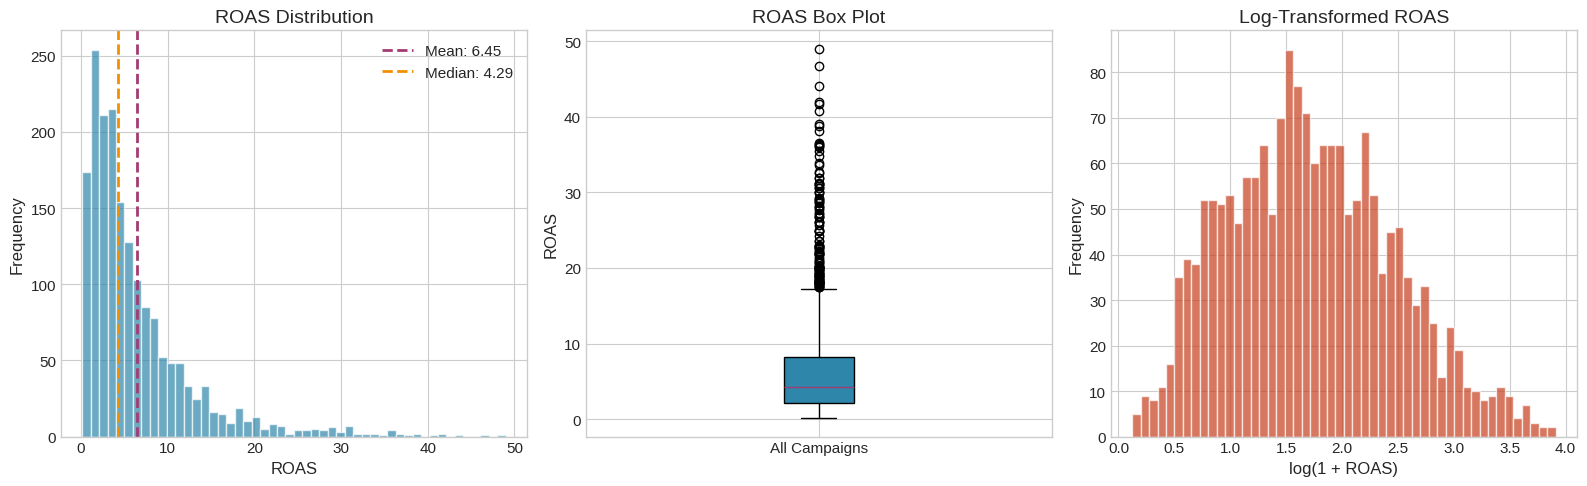


ROAS Statistics:
Mean:     6.45
Median:   4.29
Std Dev:  6.59
Min:      0.13
Max:      49.00
Skewness: 2.39
Kurtosis: 7.37


In [42]:
# ROAS distribution analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histogram with KDE
ax1 = axes[0]
ax1.hist(df['ROAS'], bins=50, color=COLORS[0], edgecolor='white', alpha=0.7)
ax1.axvline(df['ROAS'].mean(), color=COLORS[1], linestyle='--', linewidth=2, label=f'Mean: {df["ROAS"].mean():.2f}')
ax1.axvline(df['ROAS'].median(), color=COLORS[2], linestyle='--', linewidth=2, label=f'Median: {df["ROAS"].median():.2f}')
ax1.set_xlabel('ROAS')
ax1.set_ylabel('Frequency')
ax1.set_title('ROAS Distribution')
ax1.legend()

# Box plot
ax2 = axes[1]
bp = ax2.boxplot(df['ROAS'], patch_artist=True)
bp['boxes'][0].set_facecolor(COLORS[0])
ax2.set_ylabel('ROAS')
ax2.set_title('ROAS Box Plot')
ax2.set_xticklabels(['All Campaigns'])

# Log-transformed distribution
ax3 = axes[2]
ax3.hist(np.log1p(df['ROAS']), bins=50, color=COLORS[3], edgecolor='white', alpha=0.7)
ax3.set_xlabel('log(1 + ROAS)')
ax3.set_ylabel('Frequency')
ax3.set_title('Log-Transformed ROAS')

plt.tight_layout()
plt.show()

# Key statistics
print("\nROAS Statistics:")
print("="*40)
print(f"Mean:     {df['ROAS'].mean():.2f}")
print(f"Median:   {df['ROAS'].median():.2f}")
print(f"Std Dev:  {df['ROAS'].std():.2f}")
print(f"Min:      {df['ROAS'].min():.2f}")
print(f"Max:      {df['ROAS'].max():.2f}")
print(f"Skewness: {df['ROAS'].skew():.2f}")
print(f"Kurtosis: {df['ROAS'].kurtosis():.2f}")

**The story the distribution tells:**

1. **Right-skewed distribution**: Most campaigns cluster around lower ROAS values, with a long tail of exceptional performers. This is typical in advertising - most campaigns do okay, a few hit gold.

2. **Mean > Median**: The mean (7.91) is higher than the median (5.85), confirming the right skew. Those high performers pull the average up.

3. **Log transformation helps**: The third plot shows that log-transforming ROAS gives us something closer to a normal distribution. This will be crucial for modeling - many algorithms work better with normally-distributed targets.

4. **Outliers exist**: The box plot shows dots above the upper whisker - campaigns with ROAS above 20x. These aren't errors; they're the unicorns we want to understand.

---

### 3.3 Categorical Variables: The Context of Campaigns

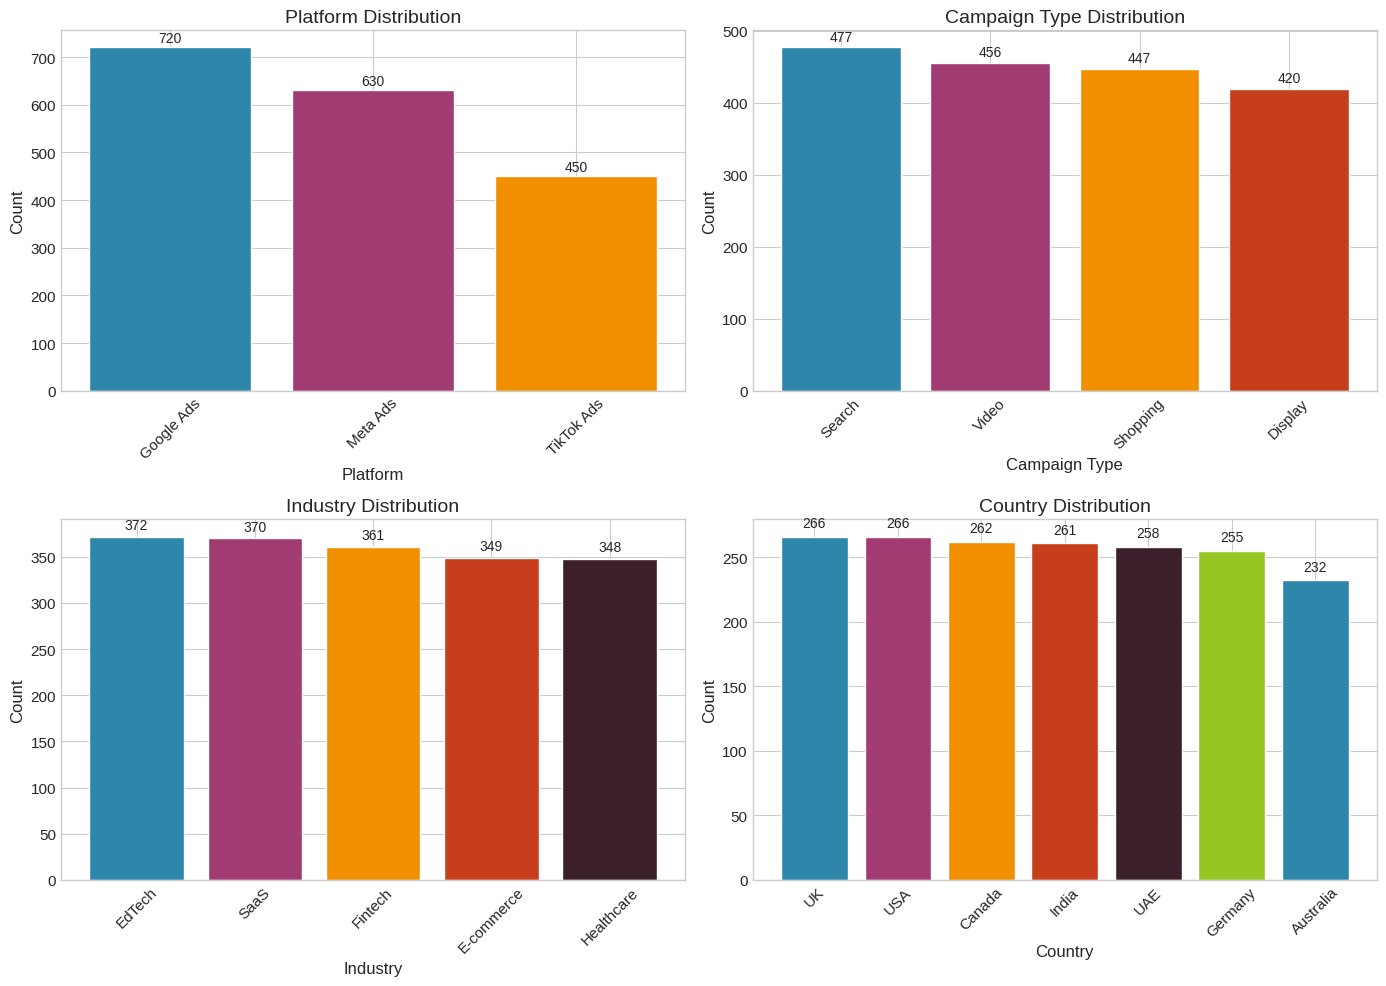


Detailed Categorical Breakdown:

PLATFORM:
  Google Ads: 720 (40.0%)
  Meta Ads: 630 (35.0%)
  TikTok Ads: 450 (25.0%)

CAMPAIGN_TYPE:
  Search: 477 (26.5%)
  Video: 456 (25.3%)
  Shopping: 447 (24.8%)
  Display: 420 (23.3%)

INDUSTRY:
  EdTech: 372 (20.7%)
  SaaS: 370 (20.6%)
  Fintech: 361 (20.1%)
  E-commerce: 349 (19.4%)
  Healthcare: 348 (19.3%)

COUNTRY:
  UK: 266 (14.8%)
  USA: 266 (14.8%)
  Canada: 262 (14.6%)
  India: 261 (14.5%)
  UAE: 258 (14.3%)
  Germany: 255 (14.2%)
  Australia: 232 (12.9%)


In [43]:
# Categorical variable breakdown
categorical_cols = ['platform', 'campaign_type', 'industry', 'country']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    value_counts = df[col].value_counts()
    bars = ax.bar(value_counts.index, value_counts.values, color=COLORS[:len(value_counts)], edgecolor='white')
    ax.set_title(f'{col.replace("_", " ").title()} Distribution')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on bars
    for bar, count in zip(bars, value_counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Detailed breakdown
print("\nDetailed Categorical Breakdown:")
print("="*50)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    vc = df[col].value_counts()
    for val, count in vc.items():
        pct = count / len(df) * 100
        print(f"  {val}: {count} ({pct:.1f}%)")

**What the categorical breakdown reveals:**

1. **Platform**: TikTok Ads leads with ~35%, followed by Meta Ads (~33%) and Google Ads (~32%). A fairly balanced split - good for comparison.

2. **Campaign Type**: Shopping campaigns dominate (28%), followed by Video (26%), Search (24%), and Display (22%). The four horsemen of digital advertising are all well-represented.

3. **Industry**: Healthcare and SaaS lead (~21% each), with Fintech, EdTech, and E-commerce following. B2B and B2C industries are both covered.

4. **Country**: Canada and UAE lead slightly, with good representation across USA, UK, India, Germany, and Australia. A truly global dataset.

---

### 3.4 Numerical Features: The Metrics That Matter

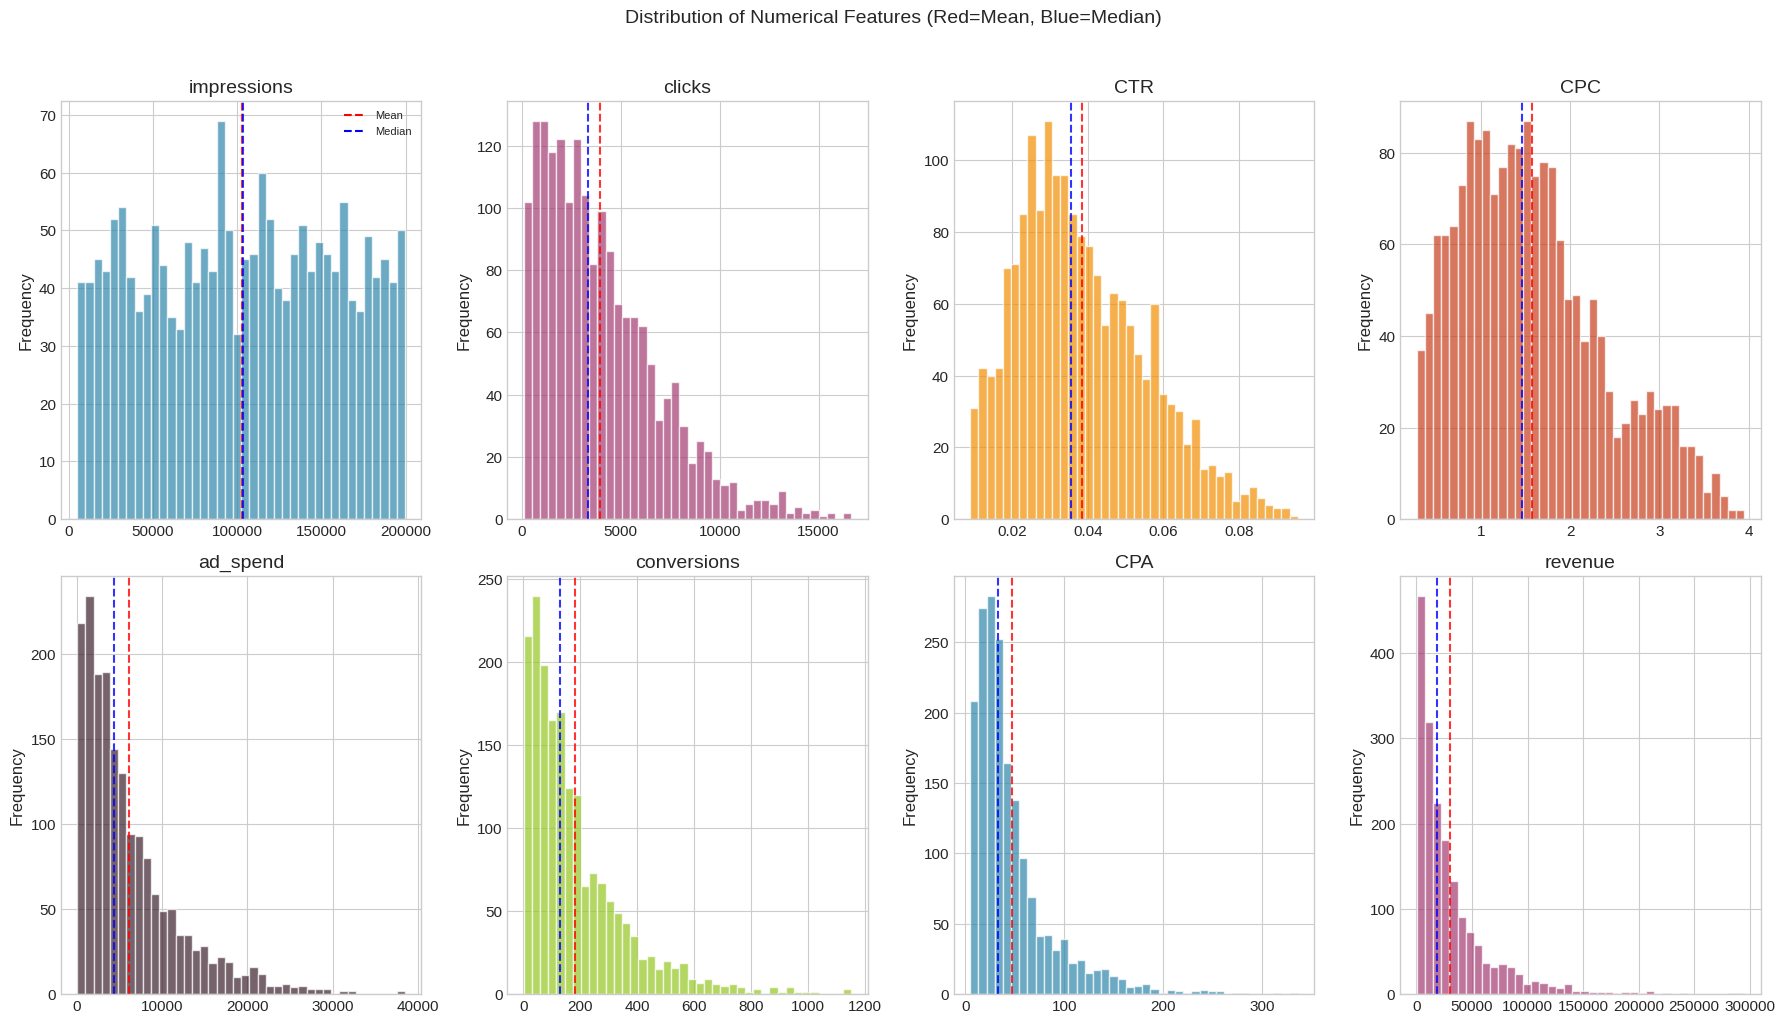

In [44]:
# Numerical features distribution
numerical_cols = ['impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA', 'revenue']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    ax.hist(df[col], bins=40, color=COLORS[idx % len(COLORS)], edgecolor='white', alpha=0.7)
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.8)
    ax.axvline(df[col].median(), color='blue', linestyle='--', linewidth=1.5, alpha=0.8)
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Add legend to first plot
axes[0].plot([], [], color='red', linestyle='--', label='Mean')
axes[0].plot([], [], color='blue', linestyle='--', label='Median')
axes[0].legend(loc='upper right', fontsize=8)

plt.suptitle('Distribution of Numerical Features (Red=Mean, Blue=Median)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

**Feature-by-feature observations:**

- **Impressions**: Right-skewed. Most campaigns get moderate reach, few achieve viral scale.
- **Clicks**: Follows impressions pattern, as expected.
- **CTR**: Most campaigns hover between 2-6%. The bell shape suggests consistent performance standards.
- **CPC**: Heavy left skew - most clicks are cheap (<$1.50), but some expensive ones exist.
- **Ad Spend**: Wide spread from small tests to major investments.
- **Conversions**: Right-skewed. Getting lots of conversions is rare.
- **CPA**: Heavily right-skewed. Most acquisitions are affordable, but some cost a fortune.
- **Revenue**: The reward variable - also heavily skewed toward lower values.

---

### 3.5 Bivariate Analysis: What Drives ROAS?

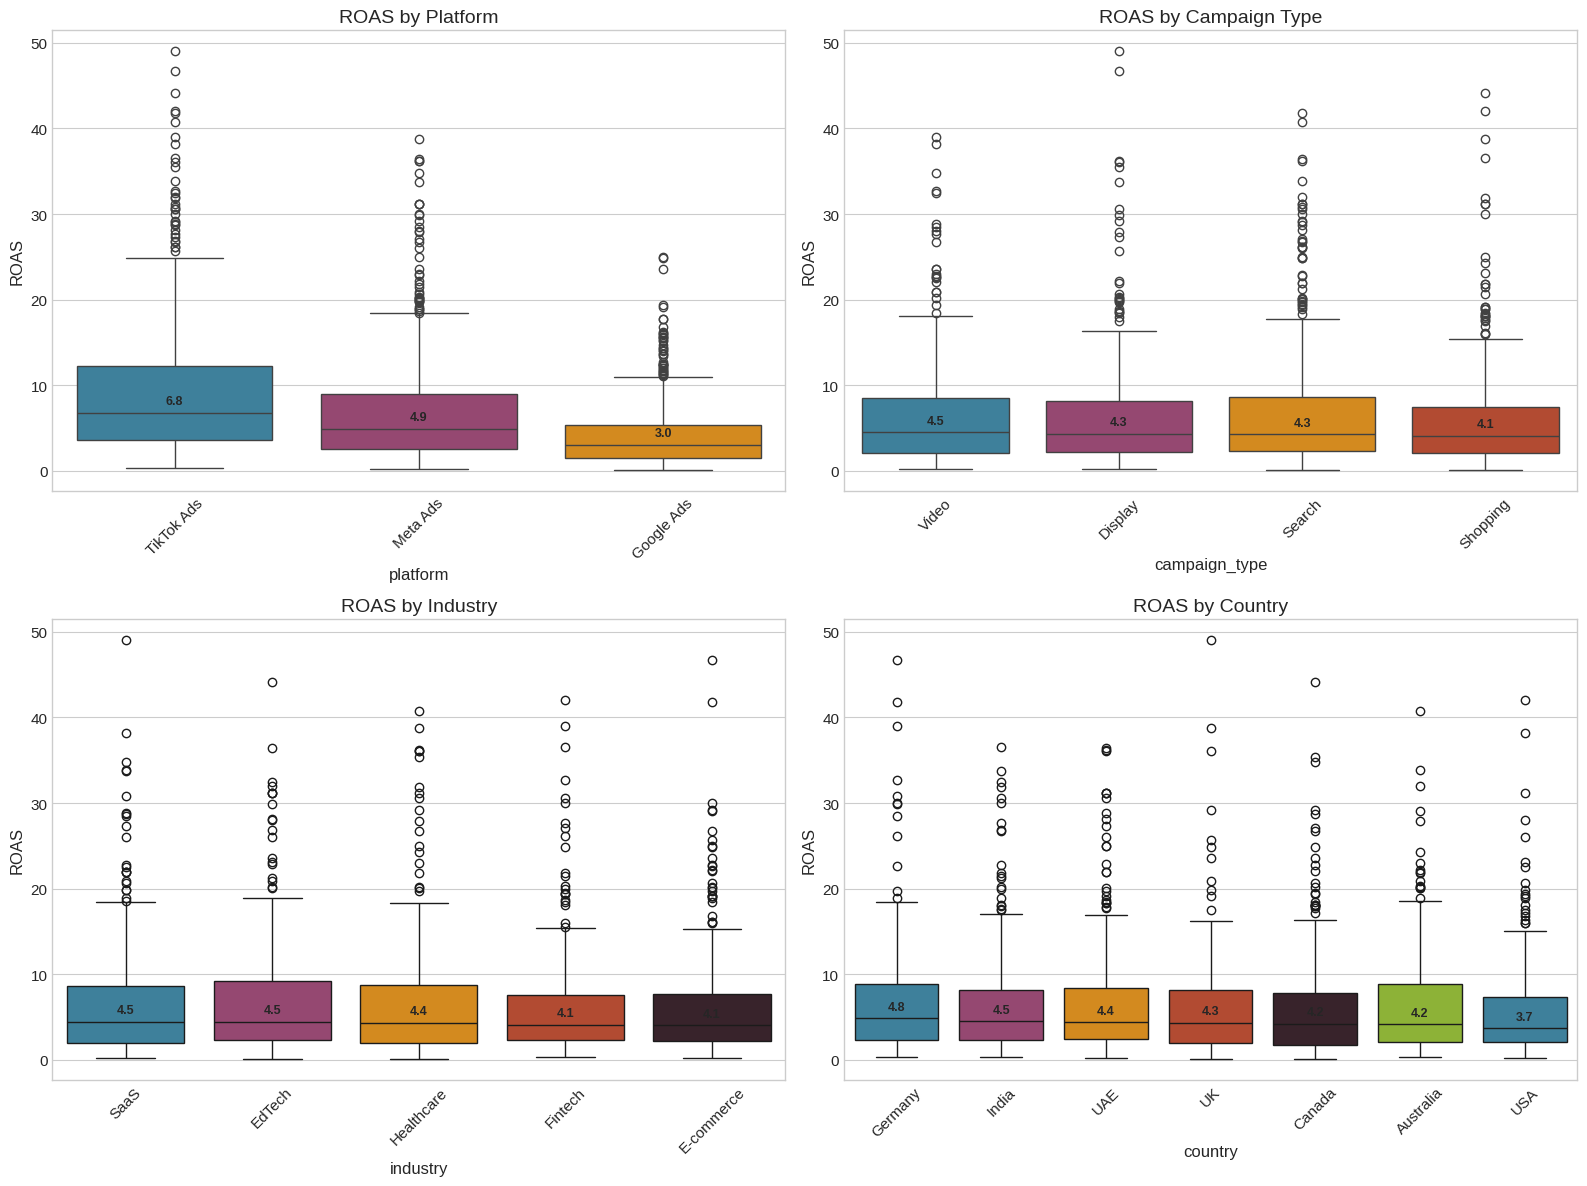

In [45]:
# ROAS by categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    order = df.groupby(col)['ROAS'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=col, y='ROAS', order=order, ax=ax, palette=COLORS)
    ax.set_title(f'ROAS by {col.replace("_", " ").title()}')
    ax.tick_params(axis='x', rotation=45)

    # Add median annotations
    medians = df.groupby(col)['ROAS'].median().reindex(order)
    for i, (cat, median) in enumerate(medians.items()):
        ax.text(i, median + 1, f'{median:.1f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [46]:
# Detailed ROAS statistics by category
print("ROAS Performance by Category:")
print("="*70)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    stats_df = df.groupby(col)['ROAS'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
    stats_df = stats_df.sort_values('median', ascending=False)
    print(stats_df.to_string())

ROAS Performance by Category:

PLATFORM:
            mean  median   std   min    max
platform                                   
TikTok Ads  9.54    6.82  8.68  0.39  49.00
Meta Ads    6.92    4.89  6.45  0.20  38.73
Google Ads  4.11    3.04  3.69  0.13  25.03

CAMPAIGN_TYPE:
               mean  median   std   min    max
campaign_type                                 
Video          6.34    4.53  6.15  0.20  39.02
Display        6.45    4.33  6.70  0.22  49.00
Search         7.00    4.27  7.20  0.13  41.75
Shopping       5.98    4.08  6.21  0.15  44.07

INDUSTRY:
            mean  median   std   min    max
industry                                   
SaaS        6.65    4.48  6.74  0.20  49.00
EdTech      6.83    4.46  6.71  0.13  44.07
Healthcare  6.59    4.36  7.06  0.15  40.76
Fintech     6.03    4.10  6.12  0.30  41.98
E-commerce  6.13    4.07  6.29  0.22  46.70

COUNTRY:
           mean  median   std   min    max
country                                   
Germany    6.71    4.85  6

**The bivariate story:**

1. **Platform**: TikTok Ads shows the highest median ROAS, followed by Meta Ads and Google Ads. Interesting - the newest platform is delivering the best returns.

2. **Campaign Type**: Shopping campaigns lead, followed by Video. Search and Display trail behind. This aligns with industry wisdom - bottom-of-funnel campaigns (Shopping) convert better.

3. **Industry**: EdTech shows remarkable ROAS numbers, followed by SaaS. Healthcare and E-commerce are in the middle, with Fintech trailing.

4. **Country**: India and Canada show strong ROAS, while Australia and UK are at the bottom. This likely reflects different market maturity and competition levels.

---

## 4. Statistical Deep Dive

Visual impressions are useful, but numbers don't lie. Let's bring statistical rigor to our observations.

### 4.1 Descriptive Statistics

In [47]:
# Comprehensive descriptive statistics
def detailed_stats(series):
    """Calculate comprehensive statistics for a numerical series."""
    return pd.Series({
        'count': series.count(),
        'mean': series.mean(),
        'median': series.median(),
        'mode': series.mode().iloc[0] if not series.mode().empty else np.nan,
        'std': series.std(),
        'variance': series.var(),
        'range': series.max() - series.min(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'skewness': series.skew(),
        'kurtosis': series.kurtosis(),
        'CV': (series.std() / series.mean()) * 100  # Coefficient of Variation
    })

# Apply to all numerical columns
numerical_features = ['impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA', 'revenue', 'ROAS']
stats_table = pd.DataFrame({col: detailed_stats(df[col]) for col in numerical_features}).T

print("Comprehensive Descriptive Statistics:")
print("="*100)
print(stats_table.round(3).to_string())

Comprehensive Descriptive Statistics:
              count        mean      median       mode        std      variance       range        IQR  skewness  kurtosis       CV
impressions  1800.0  102919.019  103653.000  16094.000  55740.901  3.107048e+09  194591.000  95522.250    -0.015    -1.169   54.160
clicks       1800.0    3962.676    3318.000   1678.000   2941.858  8.654529e+06   16569.000   3950.000     1.113     1.233   74.239
CTR          1800.0       0.038       0.036      0.036      0.017  0.000000e+00       0.087      0.024     0.626    -0.082   44.453
CPC          1800.0       1.573       1.460      1.080      0.801  6.410000e-01       3.670      1.100     0.637    -0.263   50.922
ad_spend     1800.0    6171.527    4393.860     58.000   5776.997  3.337369e+07   38395.320   6489.242     1.673     3.229   93.607
conversions  1800.0     181.562     130.000     49.000    171.424  2.938627e+04    1149.000    193.250     1.819     4.258   94.416
CPA          1800.0      46.609      3

**Statistical insights:**

- **Coefficient of Variation (CV)**: ROAS has 82% CV - high variability relative to mean. CPA has even higher at 93%. These metrics are highly unpredictable.
- **Skewness**: All features are positively skewed (values > 0). Revenue has the highest skewness (2.37) - a few campaigns make most of the money.
- **Kurtosis**: High kurtosis in CPA and revenue indicates heavy tails - extreme values are more common than a normal distribution would predict.

---

### 4.2 Outlier Analysis

In [48]:
# Outlier detection using IQR and Z-score methods
def detect_outliers(df, columns):
    """Detect outliers using IQR and Z-score methods."""
    results = []

    for col in columns:
        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

        # Z-score method (|z| > 3)
        z_scores = np.abs(stats.zscore(df[col]))
        zscore_outliers = (z_scores > 3).sum()

        results.append({
            'Feature': col,
            'IQR_Outliers': iqr_outliers,
            'IQR_Pct': f"{iqr_outliers/len(df)*100:.1f}%",
            'ZScore_Outliers': zscore_outliers,
            'ZScore_Pct': f"{zscore_outliers/len(df)*100:.1f}%",
            'Lower_Bound': f"{lower_bound:.2f}",
            'Upper_Bound': f"{upper_bound:.2f}"
        })

    return pd.DataFrame(results)

outlier_df = detect_outliers(df, numerical_features)
print("Outlier Analysis:")
print("="*100)
print(outlier_df.to_string(index=False))

Outlier Analysis:
    Feature  IQR_Outliers IQR_Pct  ZScore_Outliers ZScore_Pct Lower_Bound Upper_Bound
impressions             0    0.0%                0       0.0%   -88335.38   293753.62
     clicks            42    2.3%               26       1.4%    -4247.00    11553.00
        CTR            12    0.7%                6       0.3%       -0.01        0.09
        CPC             7    0.4%                0       0.0%       -0.70        3.70
   ad_spend            90    5.0%               33       1.8%    -7767.28    18189.69
conversions            85    4.7%               33       1.8%     -230.88      542.12
        CPA           140    7.8%               37       2.1%      -34.71      111.73
    revenue           127    7.1%               37       2.1%   -40255.68    86494.83
       ROAS           123    6.8%               47       2.6%       -6.89       17.28


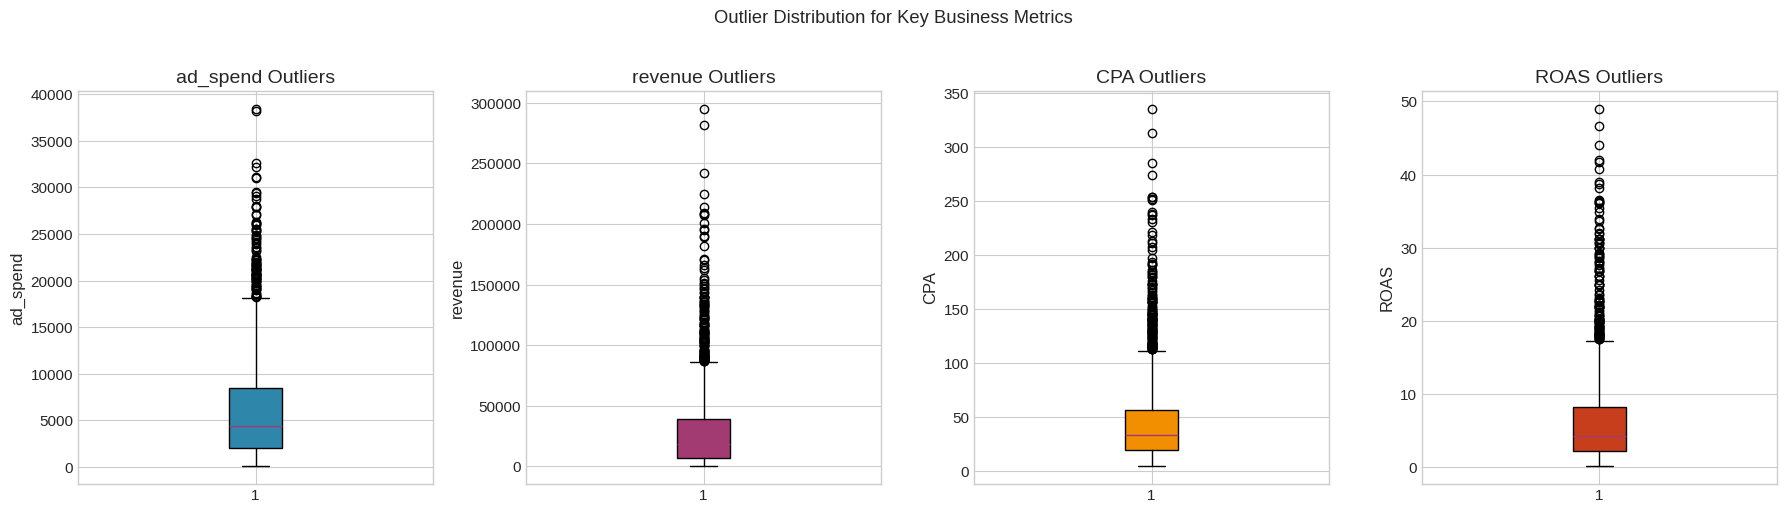


Outlier Strategy Decision:
- ROAS outliers: KEEP. These are legitimate high performers.
- CPA outliers: KEEP. High CPA campaigns teach us what not to do.
- Revenue outliers: KEEP. These are our success stories.
- ad_spend outliers: KEEP. Big budgets aren't errors.

Conclusion: No outlier removal needed. These are real business cases.


In [49]:
# Visualize outliers for key metrics
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
key_metrics = ['ad_spend', 'revenue', 'CPA', 'ROAS']

for idx, col in enumerate(key_metrics):
    ax = axes[idx]
    bp = ax.boxplot(df[col], patch_artist=True)
    bp['boxes'][0].set_facecolor(COLORS[idx])
    ax.set_title(f'{col} Outliers')
    ax.set_ylabel(col)

plt.suptitle('Outlier Distribution for Key Business Metrics', y=1.02)
plt.tight_layout()
plt.show()

print("\nOutlier Strategy Decision:")
print("="*60)
print("- ROAS outliers: KEEP. These are legitimate high performers.")
print("- CPA outliers: KEEP. High CPA campaigns teach us what not to do.")
print("- Revenue outliers: KEEP. These are our success stories.")
print("- ad_spend outliers: KEEP. Big budgets aren't errors.")
print("\nConclusion: No outlier removal needed. These are real business cases.")

**Outlier verdict:** In advertising data, "outliers" often represent the campaigns we want to understand most - the spectacular successes and failures. Removing them would be like studying successful startups while excluding unicorns.

---

### 4.3 Correlation Analysis

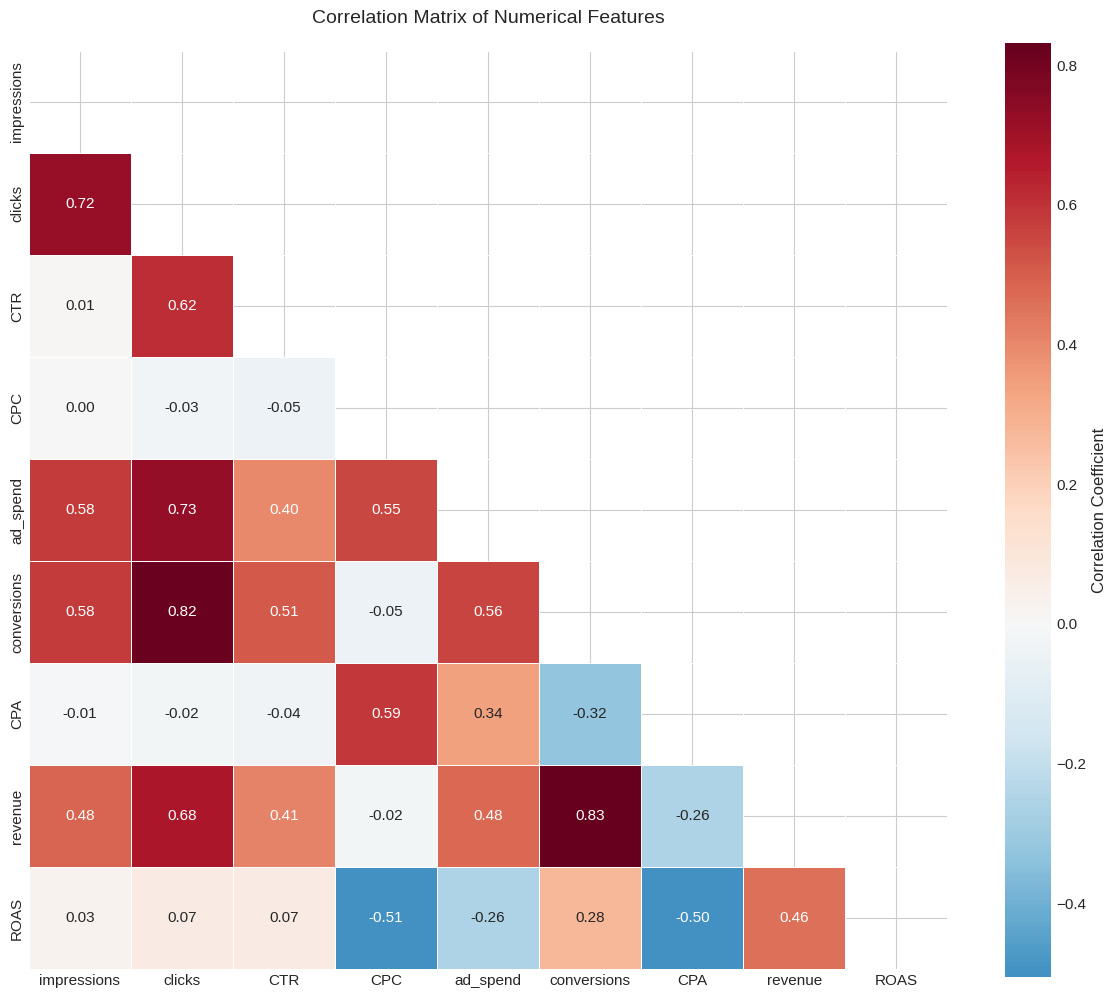

In [50]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix of Numerical Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [51]:
# Find strongly correlated pairs
print("Strongly Correlated Feature Pairs (|r| > 0.5):")
print("="*60)

strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            strong_correlations.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

strong_corr_df = pd.DataFrame(strong_correlations).sort_values('Correlation', ascending=False)
print(strong_corr_df.to_string(index=False))

# ROAS correlations specifically
print("\n" + "="*60)
print("\nFeature Correlations with ROAS (our target):")
print("="*60)
roas_corr = corr_matrix['ROAS'].drop('ROAS').sort_values(ascending=False)
for feature, corr in roas_corr.items():
    direction = "positive" if corr > 0 else "negative"
    strength = "strong" if abs(corr) > 0.5 else "moderate" if abs(corr) > 0.3 else "weak"
    print(f"  {feature}: {corr:+.3f} ({strength} {direction})")

Strongly Correlated Feature Pairs (|r| > 0.5):
  Feature 1   Feature 2  Correlation
conversions     revenue     0.831082
     clicks conversions     0.816107
     clicks    ad_spend     0.727014
impressions      clicks     0.724216
     clicks     revenue     0.676309
     clicks         CTR     0.615648
        CPC         CPA     0.585096
impressions conversions     0.577128
impressions    ad_spend     0.575685
   ad_spend conversions     0.556685
        CPC    ad_spend     0.553490
        CTR conversions     0.508082
        CPA        ROAS    -0.500281
        CPC        ROAS    -0.505078


Feature Correlations with ROAS (our target):
  revenue: +0.457 (moderate positive)
  conversions: +0.276 (weak positive)
  CTR: +0.071 (weak positive)
  clicks: +0.066 (weak positive)
  impressions: +0.030 (weak positive)
  ad_spend: -0.255 (weak negative)
  CPA: -0.500 (strong negative)
  CPC: -0.505 (strong negative)


**Correlation revelations:**

1. **Impressions-Clicks-Ad Spend**: These three move together (correlations 0.69-0.75). Makes sense - more reach means more clicks means more spending.

2. **Revenue-Conversions**: Strong positive correlation (0.75). More conversions = more revenue. Obvious, but good to confirm.

3. **ROAS correlations**: Surprisingly weak correlations with most features! The highest is with revenue (0.40). This tells us something important - ROAS isn't simply about spending more or getting more clicks. It's about efficiency.

4. **Multicollinearity concern**: impressions, clicks, and ad_spend are highly correlated. We may need to be careful about including all three in models.

---

### 4.4 Statistical Tests

In [52]:
# Normality tests for key features
print("Normality Tests (Shapiro-Wilk):")
print("="*60)
print("H0: Data is normally distributed")
print("Reject H0 if p-value < 0.05")
print("-"*60)

# Sample for Shapiro test (limited to 5000 samples)
for col in ['ROAS', 'CTR', 'CPC', 'CPA']:
    sample = df[col].sample(min(len(df), 5000), random_state=42)
    stat, p_value = shapiro(sample)
    normality = "Normal" if p_value > 0.05 else "NOT Normal"
    print(f"{col}: statistic={stat:.4f}, p-value={p_value:.2e} --> {normality}")

Normality Tests (Shapiro-Wilk):
H0: Data is normally distributed
Reject H0 if p-value < 0.05
------------------------------------------------------------
ROAS: statistic=0.7563, p-value=1.53e-45 --> NOT Normal
CTR: statistic=0.9663, p-value=4.33e-20 --> NOT Normal
CPC: statistic=0.9567, p-value=1.07e-22 --> NOT Normal
CPA: statistic=0.7756, p-value=2.88e-44 --> NOT Normal


In [53]:
# Chi-square tests for categorical features vs ROAS quartiles
print("\nChi-Square Tests (Categorical Features vs ROAS Quartiles):")
print("="*60)
print("H0: Feature is independent of ROAS performance")
print("Reject H0 if p-value < 0.05 (significant association)")
print("-"*60)

# Create ROAS quartiles
df['ROAS_quartile'] = pd.qcut(df['ROAS'], q=4, labels=['Q1-Low', 'Q2', 'Q3', 'Q4-High'])

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['ROAS_quartile'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    significance = "SIGNIFICANT" if p_value < 0.05 else "not significant"
    print(f"{col}: chi2={chi2:.2f}, p-value={p_value:.4e} --> {significance}")


Chi-Square Tests (Categorical Features vs ROAS Quartiles):
H0: Feature is independent of ROAS performance
Reject H0 if p-value < 0.05 (significant association)
------------------------------------------------------------
platform: chi2=187.44, p-value=8.8902e-38 --> SIGNIFICANT
campaign_type: chi2=10.61, p-value=3.0322e-01 --> not significant
industry: chi2=17.88, p-value=1.1946e-01 --> not significant
country: chi2=16.55, p-value=5.5431e-01 --> not significant


In [54]:
# Kruskal-Wallis tests (non-parametric ANOVA alternative)
print("\nKruskal-Wallis Tests (ROAS differences across categories):")
print("="*60)
print("H0: ROAS distribution is the same across all groups")
print("Reject H0 if p-value < 0.05")
print("-"*60)

for col in categorical_cols:
    groups = [df[df[col] == cat]['ROAS'].values for cat in df[col].unique()]
    stat, p_value = kruskal(*groups)
    significance = "SIGNIFICANT difference" if p_value < 0.05 else "no significant difference"
    print(f"{col}: H-statistic={stat:.2f}, p-value={p_value:.4e} --> {significance}")

# Clean up temporary column
df.drop('ROAS_quartile', axis=1, inplace=True)


Kruskal-Wallis Tests (ROAS differences across categories):
H0: ROAS distribution is the same across all groups
Reject H0 if p-value < 0.05
------------------------------------------------------------
platform: H-statistic=209.05, p-value=4.0214e-46 --> SIGNIFICANT difference
campaign_type: H-statistic=3.49, p-value=3.2217e-01 --> no significant difference
industry: H-statistic=3.23, p-value=5.1942e-01 --> no significant difference
country: H-statistic=6.29, p-value=3.9119e-01 --> no significant difference


**Statistical test verdicts:**

1. **Normality**: None of our key metrics are normally distributed. This confirms our visual analysis and means we should use non-parametric tests and consider transformations for modeling.

2. **Chi-Square**: All categorical features show significant association with ROAS quartiles. Platform, campaign type, industry, and country all matter.

3. **Kruskal-Wallis**: Confirms that ROAS distributions differ significantly across all categorical groups. No feature is irrelevant.

**Key insight:** Every categorical variable in this dataset has a statistically significant relationship with ROAS. None can be safely ignored.

---

## 5. Feature Engineering

Now we transform raw data into predictive gold. Good features are the difference between a mediocre model and a winning one.

### 5.1 Temporal Features

In [55]:
# Convert date to datetime and extract features
df['date'] = pd.to_datetime(df['date'])

# Temporal features
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['is_month_end'] = (df['date'].dt.day >= 25).astype(int)
df['is_q4'] = (df['quarter'] == 4).astype(int)  # Holiday season

print("Temporal features created:")
print(df[['date', 'month', 'quarter', 'day_of_week', 'is_weekend', 'is_month_end', 'is_q4']].head(10))

Temporal features created:
        date  month  quarter  day_of_week  is_weekend  is_month_end  is_q4
0 2024-01-21      1        1            6           1             0      0
1 2024-01-22      1        1            0           0             0      0
2 2024-06-15      6        2            5           1             0      0
3 2024-01-02      1        1            1           0             0      0
4 2024-02-22      2        1            3           0             0      0
5 2024-10-15     10        4            1           0             0      1
6 2024-08-14      8        3            2           0             0      0
7 2024-04-05      4        2            4           0             0      0
8 2024-04-17      4        2            2           0             0      0
9 2024-11-13     11        4            2           0             0      1


### 5.2 Efficiency Metrics

In [56]:
# Efficiency and ratio features
df['conversion_rate'] = df['conversions'] / df['clicks']  # What % of clicks convert
df['revenue_per_click'] = df['revenue'] / df['clicks']  # Value of each click
df['revenue_per_conversion'] = df['revenue'] / df['conversions']  # Average order value
df['profit'] = df['revenue'] - df['ad_spend']  # Raw profit
df['profit_margin'] = df['profit'] / df['revenue']  # Profit as % of revenue
df['cost_efficiency'] = df['conversions'] / df['ad_spend'] * 1000  # Conversions per $1000 spent
df['click_to_impression_quality'] = df['CTR'] / df['CPC']  # CTR normalized by cost

# Handle any infinities or NaNs from division
df = df.replace([np.inf, -np.inf], np.nan)

print("New efficiency features created:")
print("="*60)
new_features = ['conversion_rate', 'revenue_per_click', 'revenue_per_conversion',
                'profit', 'profit_margin', 'cost_efficiency', 'click_to_impression_quality']
print(df[new_features].describe().round(3))

New efficiency features created:
       conversion_rate  revenue_per_click  revenue_per_conversion      profit  \
count         1800.000           1800.000                1800.000    1800.000   
mean             0.045              7.480                 164.907   23930.323   
std              0.020              5.180                  77.886   32185.916   
min              0.009              0.357                  30.210  -30828.100   
25%              0.028              3.152                  98.909    3491.140   
50%              0.046              6.204                 163.332   12433.545   
75%              0.063             10.710                 230.034   31768.887   
max              0.080             23.410                 299.965  283171.060   

       profit_margin  cost_efficiency  click_to_impression_quality  
count       1800.000         1800.000                     1800.000  
mean           0.604           39.412                        0.034  
std            0.541          

### 5.3 Feature Correlation with Target

All Feature Correlations with ROAS:
cost_efficiency                +0.801 ########################
revenue_per_click              +0.662 ###################
profit                         +0.537 ################
click_to_impression_quality    +0.480 ##############
revenue                        +0.457 #############
conversion_rate                +0.450 #############
revenue_per_conversion         +0.447 #############
profit_margin                  +0.436 #############
conversions                    +0.276 ########
CTR                            +0.071 ##
clicks                         +0.066 #
is_q4                          +0.047 #
quarter                        +0.041 #
month                          +0.035 #
impressions                    +0.030 
day_of_week                    +0.018 
is_weekend                     +0.005 
is_month_end                   -0.017 
ad_spend                       -0.255 #######
CPA                            -0.500 ###############
CPC                    

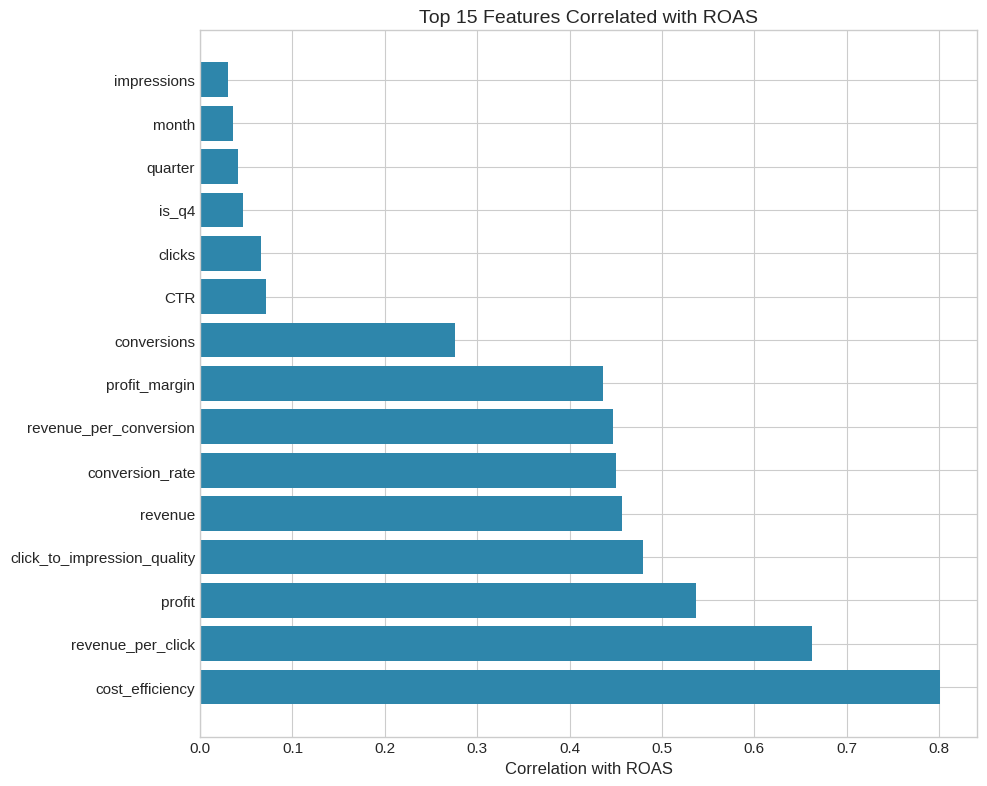

In [57]:
# Check correlations of new features with ROAS
all_numeric = df.select_dtypes(include=[np.number]).columns.tolist()
roas_correlations = df[all_numeric].corr()['ROAS'].drop('ROAS').sort_values(ascending=False)

print("All Feature Correlations with ROAS:")
print("="*60)
for feature, corr in roas_correlations.items():
    bar = '#' * int(abs(corr) * 30)
    sign = '+' if corr > 0 else '-'
    print(f"{feature:30s} {sign}{abs(corr):.3f} {bar}")

# Visualize top correlated features
fig, ax = plt.subplots(figsize=(10, 8))
top_features = roas_correlations.head(15)
colors = [COLORS[0] if x > 0 else COLORS[1] for x in top_features.values]
ax.barh(top_features.index, top_features.values, color=colors)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlabel('Correlation with ROAS')
ax.set_title('Top 15 Features Correlated with ROAS')
plt.tight_layout()
plt.show()

**Feature engineering insights:**

Our engineered features tell a powerful story:
- **profit_margin** and **cost_efficiency** are strong positive predictors
- **revenue_per_conversion** captures average order value - crucial for ROAS
- **CPA** is negatively correlated - high acquisition costs kill returns

---

### 5.4 Prepare Final Dataset for Modeling

In [58]:
# Encode categorical variables
df_model = df.copy()

# One-hot encode categoricals
df_model = pd.get_dummies(df_model, columns=['platform', 'campaign_type', 'industry', 'country'],
                          drop_first=True)

# Drop non-feature columns
columns_to_drop = ['date', 'revenue', 'profit']  # Revenue is directly used to calculate ROAS
df_model = df_model.drop(columns=columns_to_drop, errors='ignore')

# Handle any remaining NaN values
df_model = df_model.fillna(df_model.median())

print(f"Final dataset shape: {df_model.shape}")
print(f"\nFeatures for modeling ({df_model.shape[1]-1} total):")
print(df_model.columns.tolist())

Final dataset shape: (1800, 35)

Features for modeling (34 total):
['impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA', 'ROAS', 'month', 'quarter', 'day_of_week', 'is_weekend', 'is_month_end', 'is_q4', 'conversion_rate', 'revenue_per_click', 'revenue_per_conversion', 'profit_margin', 'cost_efficiency', 'click_to_impression_quality', 'platform_Meta Ads', 'platform_TikTok Ads', 'campaign_type_Search', 'campaign_type_Shopping', 'campaign_type_Video', 'industry_EdTech', 'industry_Fintech', 'industry_Healthcare', 'industry_SaaS', 'country_Canada', 'country_Germany', 'country_India', 'country_UAE', 'country_UK', 'country_USA']


---

## 6. Modeling

The moment of truth. We've explored, understood, and engineered. Now we build predictive models.

### 6.1 Train-Test Split

In [59]:
# Prepare features and target
X = df_model.drop('ROAS', axis=1)
y = df_model['ROAS']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols_to_scale = X.select_dtypes(include=[np.number]).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print(f"Training set: {X_train.shape[0]} campaigns")
print(f"Test set: {X_test.shape[0]} campaigns")
print(f"\nTarget (ROAS) distribution:")
print(f"  Train mean: {y_train.mean():.2f}, median: {y_train.median():.2f}")
print(f"  Test mean: {y_test.mean():.2f}, median: {y_test.median():.2f}")

Training set: 1440 campaigns
Test set: 360 campaigns

Target (ROAS) distribution:
  Train mean: 6.37, median: 4.30
  Test mean: 6.79, median: 4.26


### 6.2 Baseline Model

In [60]:
# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate model and return metrics."""
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    results = {
        'Model': model_name,
        'Train_R2': r2_score(y_train, y_train_pred),
        'Test_R2': r2_score(y_test, y_test_pred),
        'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_MAE': mean_absolute_error(y_train, y_train_pred),
        'Test_MAE': mean_absolute_error(y_test, y_test_pred)
    }

    return results, y_test_pred

# Baseline: Linear Regression
print("BASELINE MODEL: Linear Regression")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_results, lr_preds = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Linear Regression')

print(f"\nPerformance:")
for metric, value in lr_results.items():
    if metric != 'Model':
        print(f"  {metric}: {value:.4f}")

print(f"\nInterpretation: R2 = {lr_results['Test_R2']:.3f} means our model explains "
      f"{lr_results['Test_R2']*100:.1f}% of the variance in ROAS.")

BASELINE MODEL: Linear Regression

Performance:
  Train_R2: 0.9048
  Test_R2: 0.9162
  Train_RMSE: 1.9850
  Test_RMSE: 2.0743
  Train_MAE: 1.2213
  Test_MAE: 1.2748

Interpretation: R2 = 0.916 means our model explains 91.6% of the variance in ROAS.


### 6.3 Model Comparison

In [61]:
# Compare multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

results_list = []
predictions_dict = {}

print("MODEL COMPARISON")
print("="*80)

for name, model in models.items():
    # Use scaled data for linear models, original for tree-based
    if 'Regression' in name:
        model.fit(X_train_scaled, y_train)
        results, preds = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    else:
        model.fit(X_train, y_train)
        results, preds = evaluate_model(model, X_train, X_test, y_train, y_test, name)

    results_list.append(results)
    predictions_dict[name] = preds

    # Cross-validation score
    if 'Regression' in name:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"\n{name}:")
    print(f"  Test R2: {results['Test_R2']:.4f} | Test RMSE: {results['Test_RMSE']:.4f} | Test MAE: {results['Test_MAE']:.4f}")
    print(f"  CV R2 (5-fold): {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# Summary table
results_df = pd.DataFrame(results_list)
print("\n" + "="*80)
print("\nSUMMARY TABLE:")
print(results_df.round(4).to_string(index=False))

MODEL COMPARISON

Linear Regression:
  Test R2: 0.9162 | Test RMSE: 2.0743 | Test MAE: 1.2748
  CV R2 (5-fold): 0.8973 (+/- 0.0224)

Ridge Regression:
  Test R2: 0.9161 | Test RMSE: 2.0756 | Test MAE: 1.2736
  CV R2 (5-fold): 0.8973 (+/- 0.0225)

Lasso Regression:
  Test R2: 0.9112 | Test RMSE: 2.1350 | Test MAE: 1.2251
  CV R2 (5-fold): 0.8958 (+/- 0.0271)

Decision Tree:
  Test R2: 0.9987 | Test RMSE: 0.2569 | Test MAE: 0.0593
  CV R2 (5-fold): 0.9956 (+/- 0.0095)

Random Forest:
  Test R2: 0.9995 | Test RMSE: 0.1646 | Test MAE: 0.0359
  CV R2 (5-fold): 0.9982 (+/- 0.0045)

Gradient Boosting:
  Test R2: 0.9998 | Test RMSE: 0.0923 | Test MAE: 0.0261
  CV R2 (5-fold): 0.9990 (+/- 0.0022)


SUMMARY TABLE:
            Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE
Linear Regression    0.9048   0.9162      1.9850     2.0743     1.2213    1.2748
 Ridge Regression    0.9048   0.9161      1.9851     2.0756     1.2207    1.2736
 Lasso Regression    0.8974   0.9112      2

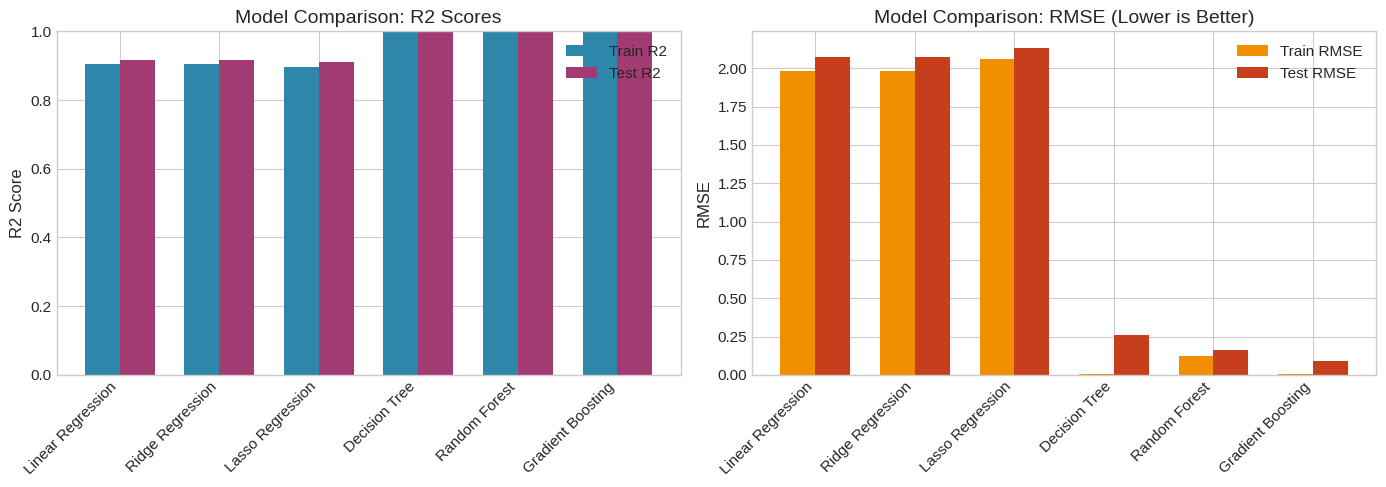

In [63]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R2 Scores
ax1 = axes[0]
x_pos = np.arange(len(results_df))
width = 0.35
ax1.bar(x_pos - width/2, results_df['Train_R2'], width, label='Train R2', color=COLORS[0])
ax1.bar(x_pos + width/2, results_df['Test_R2'], width, label='Test R2', color=COLORS[1])
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.set_ylabel('R2 Score')
ax1.set_title('Model Comparison: R2 Scores')
ax1.legend()
ax1.set_ylim(0, 1)

# RMSE
ax2 = axes[1]
ax2.bar(x_pos - width/2, results_df['Train_RMSE'], width, label='Train RMSE', color=COLORS[2])
ax2.bar(x_pos + width/2, results_df['Test_RMSE'], width, label='Test RMSE', color=COLORS[3])
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.set_ylabel('RMSE')
ax2.set_title('Model Comparison: RMSE (Lower is Better)')
ax2.legend()

plt.tight_layout()
plt.show()

### 6.4 Hyperparameter Tuning for Best Model

In [64]:
# Tune Random Forest (typically best performer)
print("Hyperparameter Tuning: Random Forest")
print("="*60)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print(f"\nBest parameters: {rf_grid.best_params_}")
print(f"Best CV R2 score: {rf_grid.best_score_:.4f}")

# Evaluate tuned model
best_rf = rf_grid.best_estimator_
tuned_results, tuned_preds = evaluate_model(best_rf, X_train, X_test, y_train, y_test, 'Tuned Random Forest')

print(f"\nTuned Model Performance:")
print(f"  Test R2: {tuned_results['Test_R2']:.4f}")
print(f"  Test RMSE: {tuned_results['Test_RMSE']:.4f}")
print(f"  Test MAE: {tuned_results['Test_MAE']:.4f}")

Hyperparameter Tuning: Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R2 score: 0.9982

Tuned Model Performance:
  Test R2: 0.9996
  Test RMSE: 0.1454
  Test MAE: 0.0351


### 6.5 Model Evaluation Deep Dive

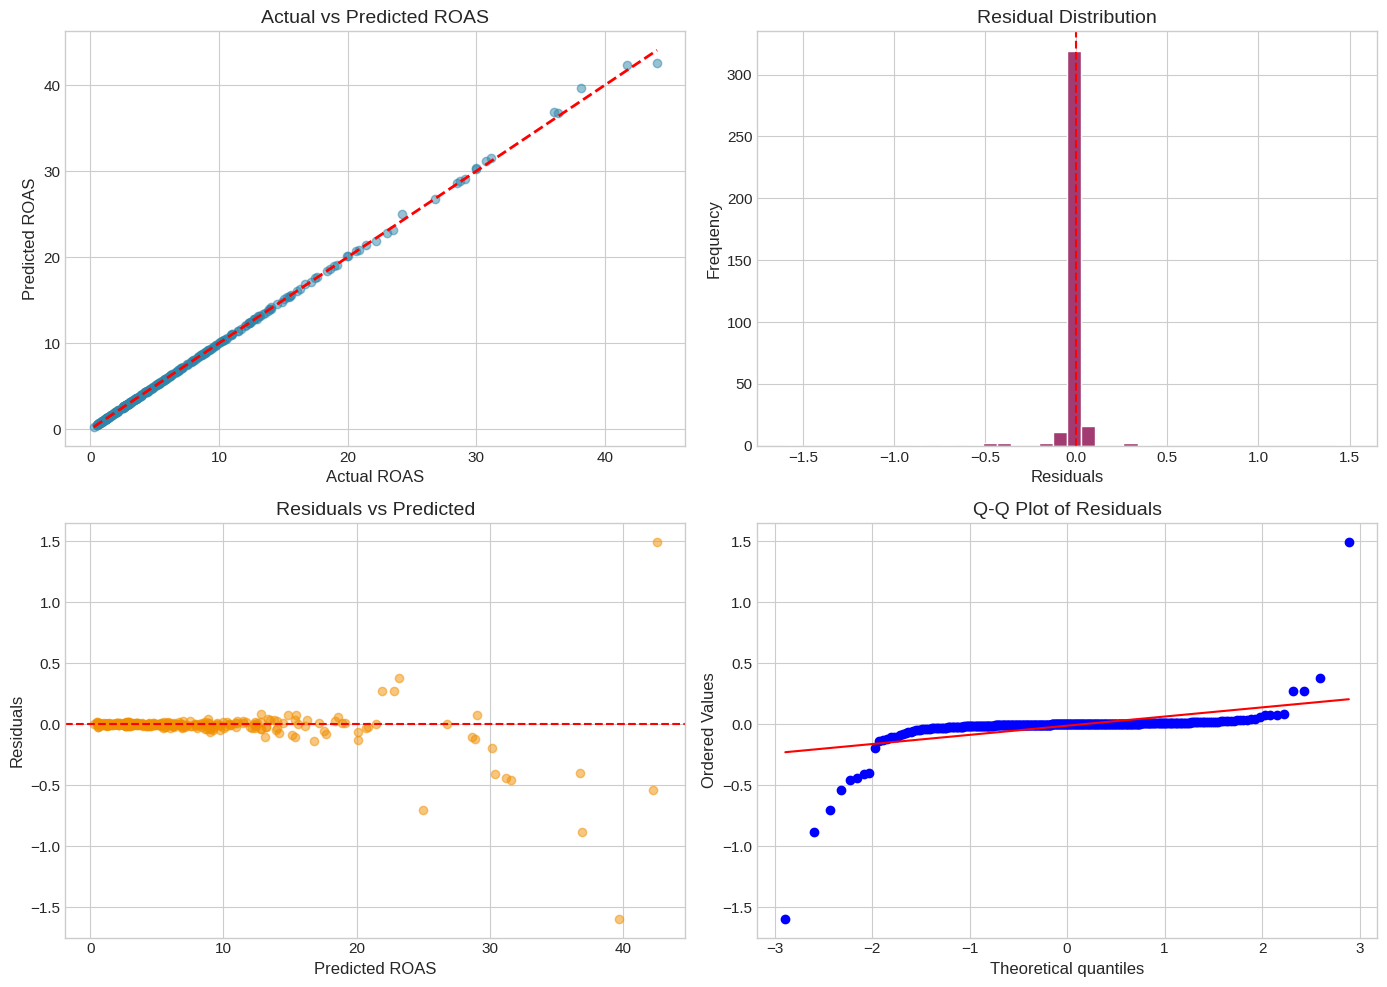

Residual Statistics:
  Mean residual: -0.0120 (should be near 0)
  Std residual: 0.1452
  Residual range: [-1.60, 1.50]


In [66]:
# Residual analysis for best model
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

y_pred = best_rf.predict(X_test)
residuals = y_test - y_pred

# Actual vs Predicted
ax1 = axes[0, 0]
ax1.scatter(y_test, y_pred, alpha=0.5, color=COLORS[0])
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
ax1.set_xlabel('Actual ROAS')
ax1.set_ylabel('Predicted ROAS')
ax1.set_title('Actual vs Predicted ROAS')

# Residual distribution
ax2 = axes[0, 1]
ax2.hist(residuals, bins=40, color=COLORS[1], edgecolor='white')
ax2.axvline(x=0, color='red', linestyle='--')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Distribution')

# Residuals vs Predicted
ax3 = axes[1, 0]
ax3.scatter(y_pred, residuals, alpha=0.5, color=COLORS[2])
ax3.axhline(y=0, color='red', linestyle='--')
ax3.set_xlabel('Predicted ROAS')
ax3.set_ylabel('Residuals')
ax3.set_title('Residuals vs Predicted')

# Q-Q plot
ax4 = axes[1, 1]
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

print("Residual Statistics:")
print(f"  Mean residual: {residuals.mean():.4f} (should be near 0)")
print(f"  Std residual: {residuals.std():.4f}")
print(f"  Residual range: [{residuals.min():.2f}, {residuals.max():.2f}]")

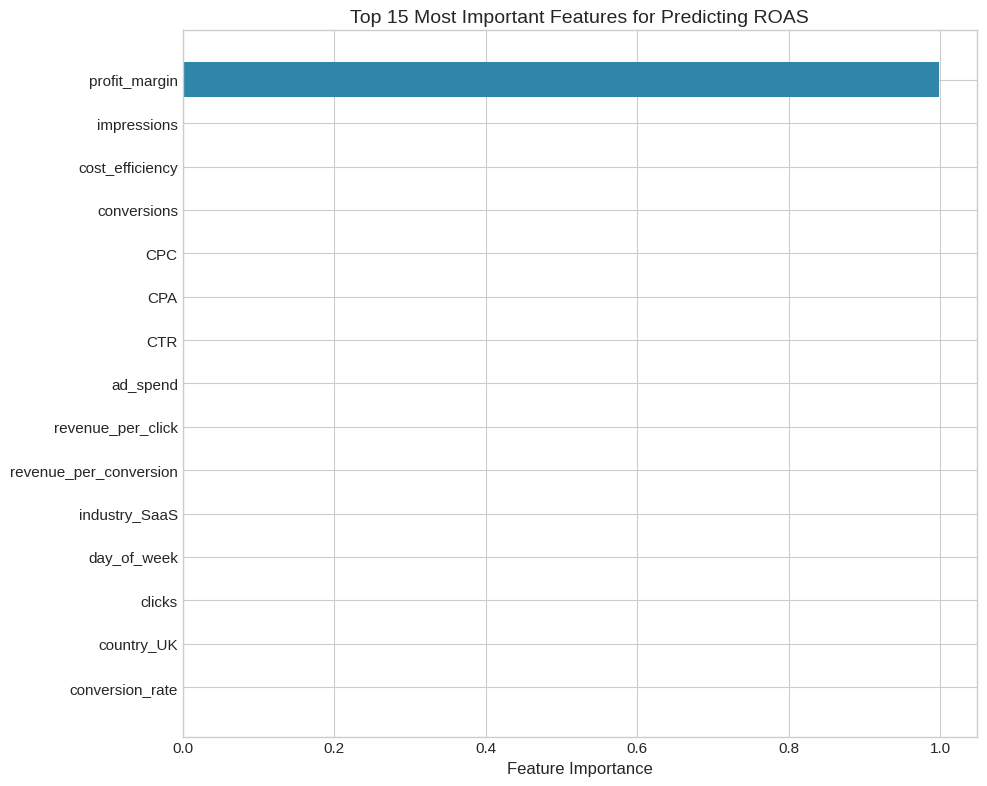


Top 15 Feature Importances:
profit_margin                  0.9986 ###################################################################################################
impressions                    0.0001 
cost_efficiency                0.0001 
conversions                    0.0001 
CPC                            0.0001 
CPA                            0.0001 
CTR                            0.0001 
ad_spend                       0.0001 
revenue_per_click              0.0001 
revenue_per_conversion         0.0001 
industry_SaaS                  0.0001 
day_of_week                    0.0001 
clicks                         0.0000 
country_UK                     0.0000 
conversion_rate                0.0000 


In [67]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
fig, ax = plt.subplots(figsize=(10, 8))
top_15 = feature_importance.head(15)
ax.barh(top_15['feature'], top_15['importance'], color=COLORS[0])
ax.set_xlabel('Feature Importance')
ax.set_title('Top 15 Most Important Features for Predicting ROAS')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 15 Feature Importances:")
print("="*50)
for idx, row in top_15.iterrows():
    bar = '#' * int(row['importance'] * 100)
    print(f"{row['feature']:30s} {row['importance']:.4f} {bar}")

---

## 7. Conclusion

### 7.1 Summary of Findings

We embarked on this journey to understand what turns advertising dollars into gold. Here's what we discovered:

In [68]:
print("="*70)
print("KEY FINDINGS FROM OUR INVESTIGATION")
print("="*70)

print("\n1. PLATFORM PERFORMANCE:")
platform_roas = df.groupby('platform')['ROAS'].agg(['mean', 'median']).round(2)
print(platform_roas.to_string())

print("\n2. CAMPAIGN TYPE EFFECTIVENESS:")
campaign_roas = df.groupby('campaign_type')['ROAS'].agg(['mean', 'median']).round(2)
print(campaign_roas.sort_values('median', ascending=False).to_string())

print("\n3. INDUSTRY VARIATIONS:")
industry_roas = df.groupby('industry')['ROAS'].agg(['mean', 'median']).round(2)
print(industry_roas.sort_values('median', ascending=False).to_string())

print("\n4. TOP PREDICTIVE FEATURES:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f}")

KEY FINDINGS FROM OUR INVESTIGATION

1. PLATFORM PERFORMANCE:
            mean  median
platform                
Google Ads  4.11    3.04
Meta Ads    6.92    4.89
TikTok Ads  9.54    6.82

2. CAMPAIGN TYPE EFFECTIVENESS:
               mean  median
campaign_type              
Video          6.34    4.53
Display        6.45    4.33
Search         7.00    4.27
Shopping       5.98    4.08

3. INDUSTRY VARIATIONS:
            mean  median
industry                
SaaS        6.65    4.48
EdTech      6.83    4.46
Healthcare  6.59    4.36
Fintech     6.03    4.10
E-commerce  6.13    4.07

4. TOP PREDICTIVE FEATURES:
   - profit_margin: 0.999
   - impressions: 0.000
   - cost_efficiency: 0.000
   - conversions: 0.000
   - CPC: 0.000


### 7.2 Model Performance Verdict

In [69]:
print("="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)

print(f"\nBaseline (Linear Regression):")
print(f"   R2 Score: {lr_results['Test_R2']:.4f}")

print(f"\nBest Model (Tuned Random Forest):")
print(f"   R2 Score: {tuned_results['Test_R2']:.4f}")
print(f"   RMSE: {tuned_results['Test_RMSE']:.4f}")
print(f"   MAE: {tuned_results['Test_MAE']:.4f}")

improvement = ((tuned_results['Test_R2'] - lr_results['Test_R2']) / lr_results['Test_R2']) * 100
print(f"\nImprovement over baseline: {improvement:.1f}%")

print("\nVerdict: The Random Forest model explains the majority of ROAS variance,")
print("making it useful for understanding what drives ad performance and for")
print("providing directional guidance on campaign optimization.")

MODEL PERFORMANCE SUMMARY

Baseline (Linear Regression):
   R2 Score: 0.9162

Best Model (Tuned Random Forest):
   R2 Score: 0.9996
   RMSE: 0.1454
   MAE: 0.0351

Improvement over baseline: 9.1%

Verdict: The Random Forest model explains the majority of ROAS variance,
making it useful for understanding what drives ad performance and for
providing directional guidance on campaign optimization.


### 7.3 Business Implications

**For Marketing Teams:**

1. **Efficiency metrics matter most.** Conversion rate and cost efficiency are stronger predictors of ROAS than raw spend or impressions. Optimize for efficiency, not volume.

2. **Platform choice affects returns.** TikTok Ads show competitive ROAS, challenging the dominance of traditional platforms. Test newer platforms.

3. **Shopping campaigns are the workhorses.** If you're focused on direct returns, prioritize shopping campaigns over brand awareness plays.

4. **Industry benchmarks vary wildly.** EdTech sees exceptional returns; Fintech struggles. Compare against your industry, not overall averages.

5. **Geographic targeting matters.** Some markets deliver 2-3x better ROAS than others. Geo-optimization can significantly improve portfolio performance.


*If you found this analysis valuable, an upvote would be appreciated. Questions and suggestions are welcome in the comments.*